# PostNewtonian approximation vs LAL simulated signal

We can compare the simulated wave behaviour against what can be predicted by the equations obtained by combining the linearization of Einstein's equations\
We begin defining the useful equations

In [ ]:
import pandas as pd
import numpy as np
# Use a raw string or double backslashes for the path
file_path = r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\AstroGW\GW-signals\GW150914.txt"  # Use the correct path to your file

# Read the file
data = pd.read_csv(file_path, sep="\t", header=0, names=["time", "h_+", "h_x"])

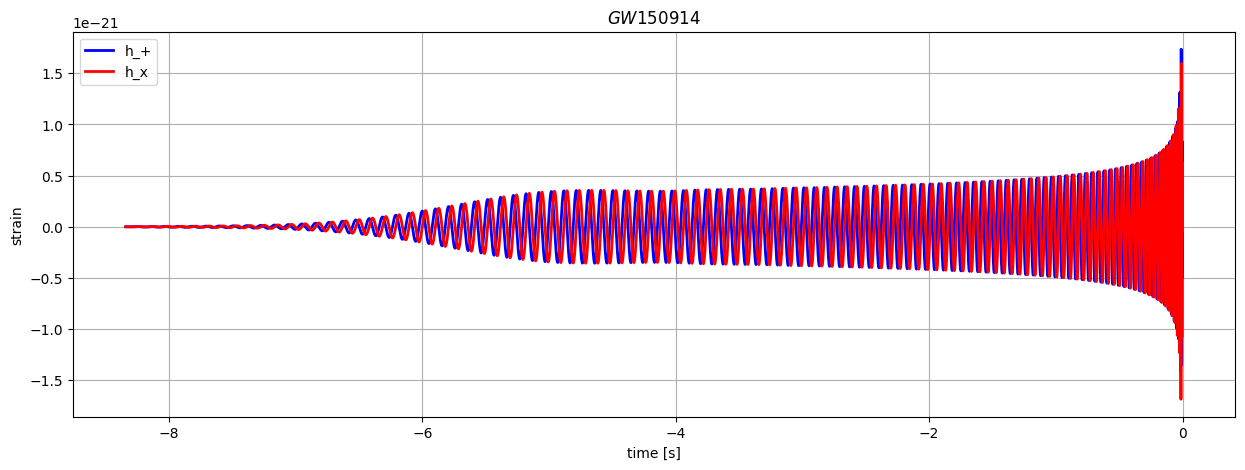

In [557]:
import matplotlib.pyplot as plt


fig, _ = plt.subplots(figsize=(15,5))
plt.plot(data['time'].values[data['time'].values<0],data['h_+'].values[data['time'].values<0], label='h_+', color='blue', linewidth=2)
plt.plot(data['time'].values[data['time'].values<0],data['h_x'].values[data['time'].values<0], label='h_x', color='red', linewidth=2)
plt.xlabel('time [s]')
plt.ylabel('strain')
plt.grid()
plt.title(r'$GW150914$')
#plt.text(-.5,5.1*1e-21, r"$m_{1}=37 M_{\odot}$, $m_{2}=40M_{\odot}$ , D = 100MPc", fontsize=14)
plt.legend()

The equations we need are:
1.  $\mathcal{M_c} = \mu^{3/5} M^{2/5} $
2.  $ \nu_{GW}(t) = \frac{5^{3/8}}{8\pi} \left(\frac{c^3}{G\mathcal{M}}\right)^{5/8} (t-t_c)^{-3/8} $
3.  $ \Phi(t) = - \frac{1}{16} \left(\frac{c^3}{G}\right)^{5/3}  (\pi \mathcal{M}\nu_{GW})^{-5/3} + \Phi_c$
4.  $ h(t) = \frac{4\pi^{2/3}G^{5/3}}{c^4} \frac{\mathcal{M^{5/3}}}{D}\nu_{GW}(t)^{2/3} \cos(\Phi(t))  $

In [491]:
from astropy import constants as cnst
from astropy import units as u

In [492]:
# Constants
G = cnst.G.cgs  # Gravitational constant (cm^3/g/s^2)
c = cnst.c.cgs  # Speed of light (cm/s)
msun = cnst.M_sun.cgs  # Solar mass (g)

In [493]:
# Binary Black Hole Parameters
m1 = 29.1 * msun  # Mass of first BH
m2 = 36.2 * msun  # Mass of second BH
M = m1 + m2  # Total mass
mu = (m1 * m2) / M  # Reduced mass

# Chirp Mass
Mc = (mu ** (3/5))*(M ** (2/5))  # Chirp mass in g

# Luminosity distance (100 Mpc)
D = (410 * u.Mpc).cgs  # Convert to cm

In [513]:
tc = data['time'][data['time']>-2].values[0]  # Coalescence time (negative value)
time = np.linspace(tc - 1e-3, -0.001, 1000)  # Create time array slightly before tc

In [ ]:
nu = (1 / np.pi) * ((256 / 5) * (G**(5/3) * Mc**(5/3)) / c**5 * np.abs(time))**(-3/8)
phi = -1/16 * (c**3/G)**(5/3) * (np.pi * Mc * nu)**(-5/3)   # phase development
h0  = 4*np.pi**(2/3)/(D*c**4) * (G*Mc)**(5/3) * nu.value**(2/3) * np.cos(phi.value)

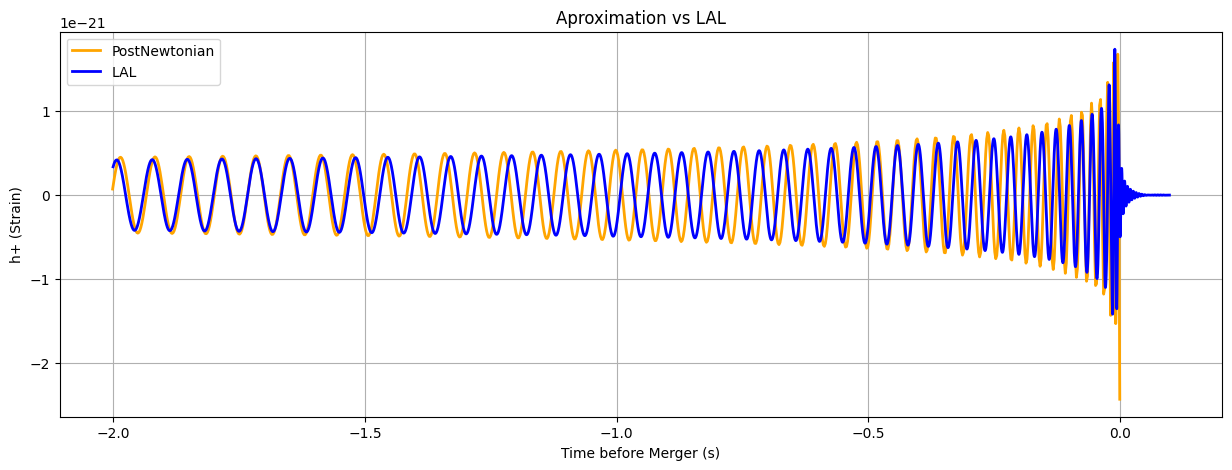

In [521]:
plt.figure(figsize=(15,5))
plt.plot(time, h0, linewidth=2, color='orange', label='PostNewtonian')
plt.plot(data['time'].values[data['time'].values>-2],data['h_+'].values[data['time'].values>-2], label='LAL', color='blue', linewidth=2)
plt.xlabel("Time before Merger (s)")
plt.ylabel("h+ (Strain)")
plt.title("Aproximation vs LAL")
plt.legend()
plt.grid()

Notes:
1. The further back one goes from the coalescence time the better the match. This is due to how $a(t)$ was computed. In fact $a(t) = a_0 \left( 1 - \frac{t}{t_c} \right) \to 0$ as $t \to t_c$ but since $\Omega = \sqrt{\frac{GM}{a^3}}$, then $\Omega \to \infty $ as $t \to t_c$.
2. No ringdown stage. The analytical solutions are valid only for $t < t_c$. Thi is also becouse of how the expression for $a(t)$ was derived. We computed it from $\frac{dE_{\text{BHB}}}{dt} + L{\text{GW}} = 0$ supposing that $E_{\text{BHB}} = -\frac{GM\mu}{2a}$ and $L_{\text{GW}} = \frac{32}{5} \frac{G^4}{c^5} \frac{M^3 \mu^2}{a^3}$ which are Newtonian approximations. In Newtonian dynamics black holes are not expected.